## Model Evaluation and Hyperparameter Tuning

In [4]:
import pandas as pd

df_cancer = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data')
df_cancer

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [23]:
from sklearn.preprocessing import LabelEncoder

X = df_cancer.iloc[:, 2:].values
y = df_cancer.iloc[:,1].values

le = LabelEncoder()
y = le.fit_transform(y)
le.classes_
le.transform(['M', 'B'])

array([1, 0])

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

## Constructing Pipelines in SciKit-Learn

In [54]:
# to account for weights contributing equally across features
from sklearn.preprocessing import StandardScaler
# reduce dimensionality
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_train)
test_accuracy = pipe_lr.score(X_test, y_test)

print(f'Test accuracy: {test_accuracy:.3f}')

Test accuracy: 0.936


## K-Fold Cross Validation

#### Manual implementation using stratified K-Fold that perserves the distribution of class labels during the folding

In [61]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)

scores = []

for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print(f'Fold: {k+1}, ',
          f'Class distr.: {np.bincount(y_train[train])}',
          f'Accuracy: {score:.3f}')

print(f'\nCV accuracy: {np.mean(scores):.3f} +/- {np.std(scores):.3f}')


Fold: 1,  Class distr.: [225 132] Accuracy: 0.950
Fold: 2,  Class distr.: [225 132] Accuracy: 0.950
Fold: 3,  Class distr.: [225 132] Accuracy: 0.925
Fold: 4,  Class distr.: [225 132] Accuracy: 0.925
Fold: 5,  Class distr.: [225 132] Accuracy: 0.925
Fold: 6,  Class distr.: [225 132] Accuracy: 0.950
Fold: 7,  Class distr.: [225 132] Accuracy: 0.975
Fold: 8,  Class distr.: [225 133] Accuracy: 0.923
Fold: 9,  Class distr.: [225 133] Accuracy: 0.974
Fold: 10,  Class distr.: [225 133] Accuracy: 0.974

CV accuracy: 0.947 +/- 0.021


#### SciKit-Learn implementation of K-Fold Cross Validation

In [67]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=-1 # n_jobs=-1 distributes the k rounds of cross-validation to all 
                                   # available CPUs in our computer. n_jobs=1 uses 1 CPU, n_jobs= 2 CPUs, and so on...
                         )
print(f'CV accuracy scores: {scores}\n')
print(f'\nCV accuracy: {np.mean(scores):.3f} +/- {np.std(scores):.3f}')


CV accuracy scores: [0.95       0.95       0.925      0.925      0.925      0.95
 0.975      0.92307692 0.97435897 0.97435897]


CV accuracy: 0.947 +/- 0.021


### Diagnosing bias & variance problems with learning curves

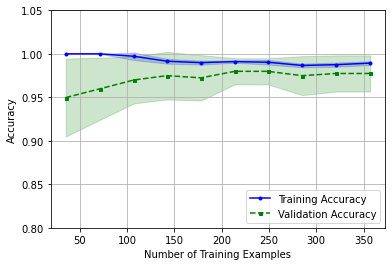

In [90]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', solver='liblinear', max_iter=10e4))

train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe_lr,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1,1.0,10),
    cv=10,
    n_jobs = -1
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker = 'o', markersize=3, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.2, color='blue')

plt.plot(train_sizes, test_mean, linestyle='--',color='green', marker = 's', markersize=3, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.2, color='green')

plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.ylim([0.80,1.05])
plt.show()

### Addressing over- & underfitting with validation curves

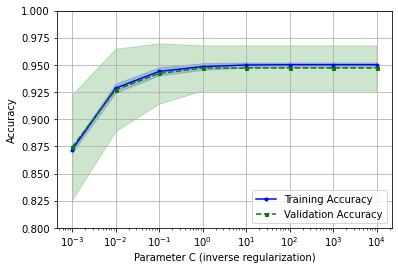

In [81]:
from sklearn.model_selection import validation_curve


param_range = [10**p for p in [-3,-2,-1,0,1,2,3, 4] ]
train_scores, test_scores = validation_curve(estimator=pipe_lr,
                                             X=X_train,
                                             y=y_train,
                                             param_name='logisticregression__C',
                                             param_range=param_range,
                                             cv=10)

train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker = 'o', markersize=3, label='Training Accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.2, color='blue')

plt.plot(param_range, test_mean, linestyle='--',color='green', marker = 's', markersize=3, label='Validation Accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.2, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C (inverse regularization)')
plt.ylabel('Accuracy')
plt.ylim([0.80,1.0])
plt.show()



